# Customer Lifetime Value: Modeling Customer Profile for Underwriting Optimization

### Summary

The goal of this project is to use Data Science models to help predict the customer lifetime value based on the customer profile, to decide whether a prospective customer would be a profitable policy to write


## Load the data set and import libraries

In [1]:
## import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

#set plotting style
sns.set_style('whitegrid')

In [2]:
clv_df = pd.read_csv(
    'https://raw.githubusercontent.com/brisamh/modeling_clv/refs/heads/main/data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

## Explore the data

In [3]:
clv_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
clv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

Observations:

1. No missing data since there are 9134 non-null inputs for all variables.  
2. There are 24 columns with different data types and 9134 rows for each column
3. Effective to date is of object type 

### Change data types, names, and formats

In [5]:
clv_df['Effective To Date'] = pd.to_datetime(clv_df['Effective To Date'])

C:\Users\njeng\AppData\Local\Temp\ipykernel_29484\3612925696.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  clv_df['Effective To Date'] = pd.to_datetime(clv_df['Effective To Date'])


In [6]:
clv_df.columns = clv_df.columns.str.replace(' ', '_')
clv_df.columns =clv_df.columns.str.lower()


In [7]:
pd.set_option('display.max_columns', None)
clv_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
clv_df = clv_df.rename(columns={'response': 'customer_response_to_offer','employmentstatus':'employment_status','effective_to_date':'policy_expiration_date'})

In [9]:
clv_df.head()

,customer,state,customer_lifetime_value,customer_response_to_offer,coverage,education,policy_expiration_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


Check for duplicate records:

In [10]:
clv_df.duplicated().sum()

np.int64(0)

Analyze categorical columns:

In [11]:
cat_cols = clv_df.select_dtypes(include='object').columns
cat_cols = cat_cols.drop('customer')
print(cat_cols)

Index(['state', 'customer_response_to_offer', 'coverage', 'education',
       'employment_status', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


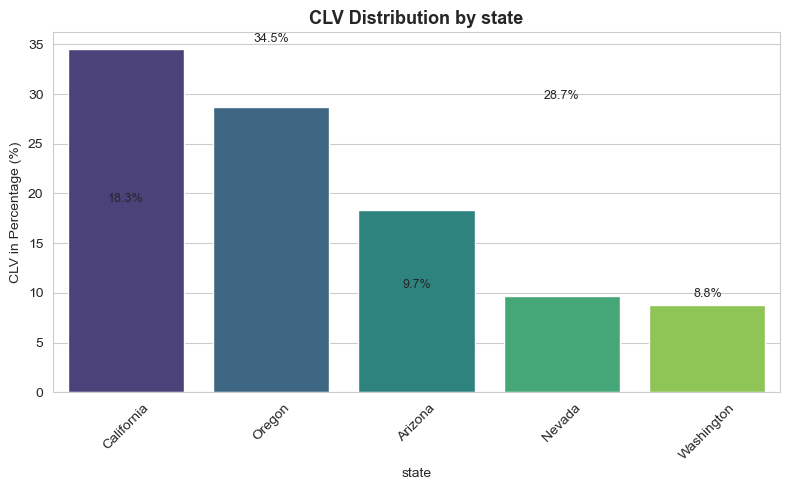

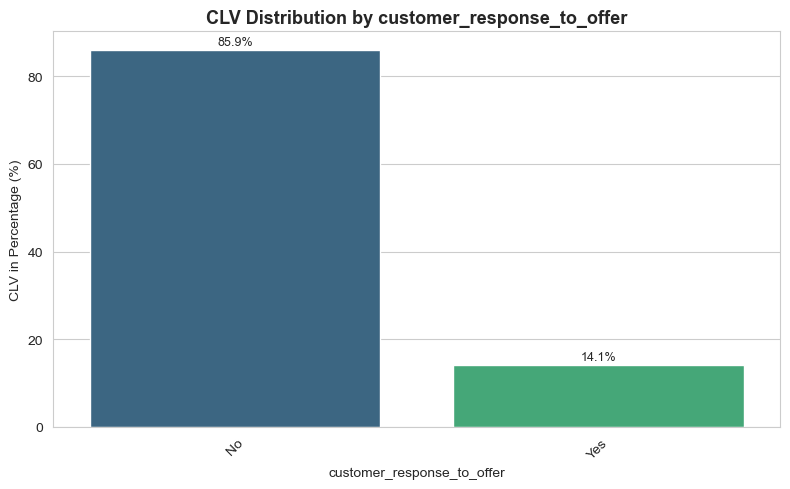

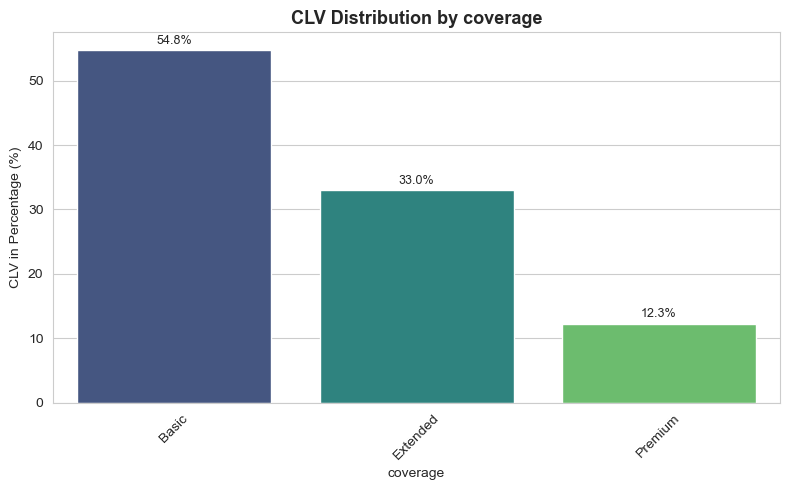

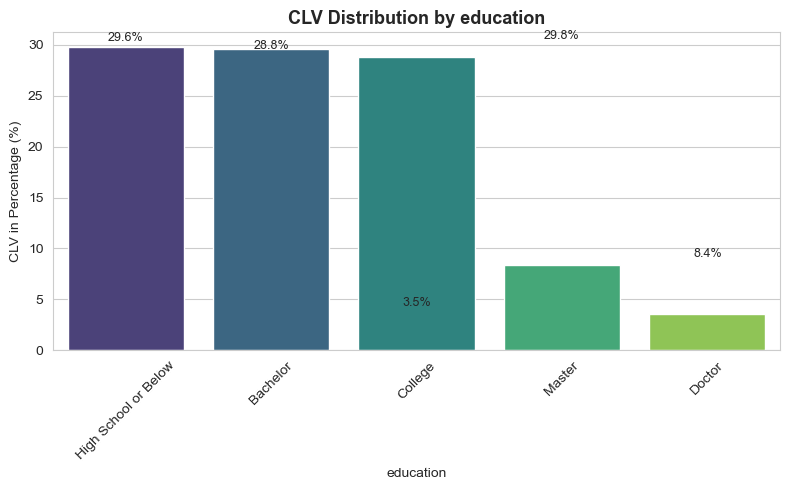

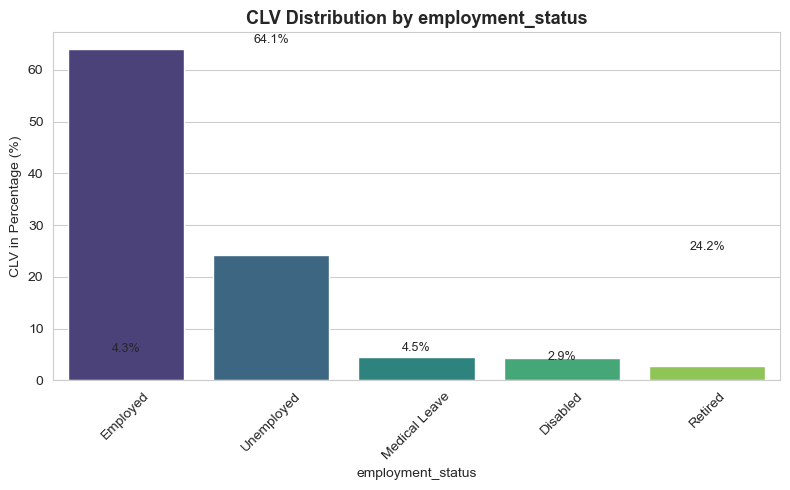

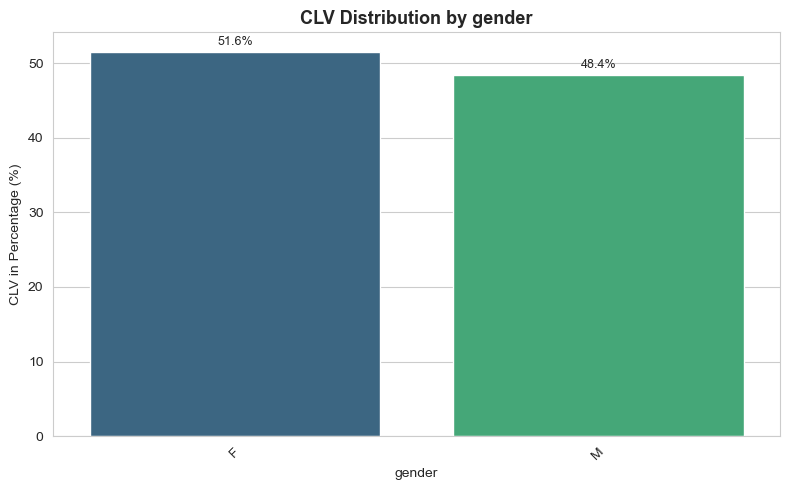

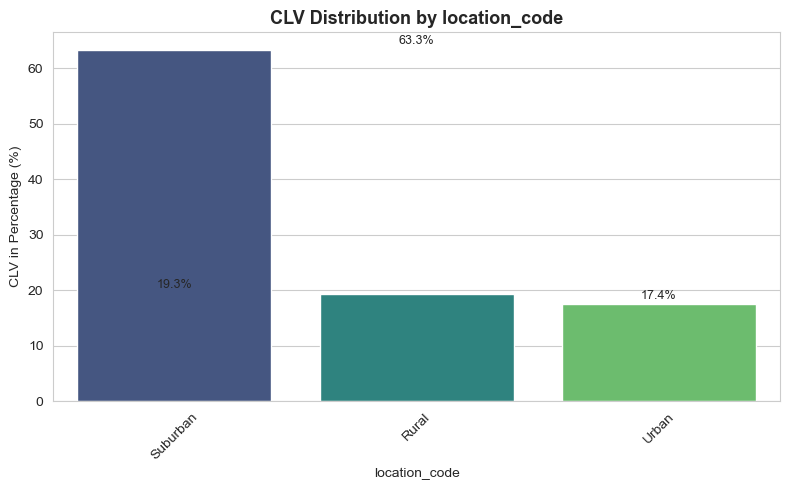

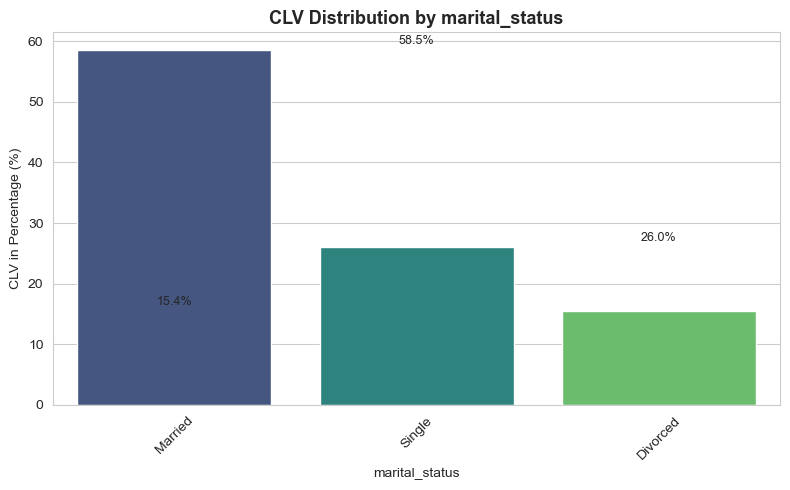

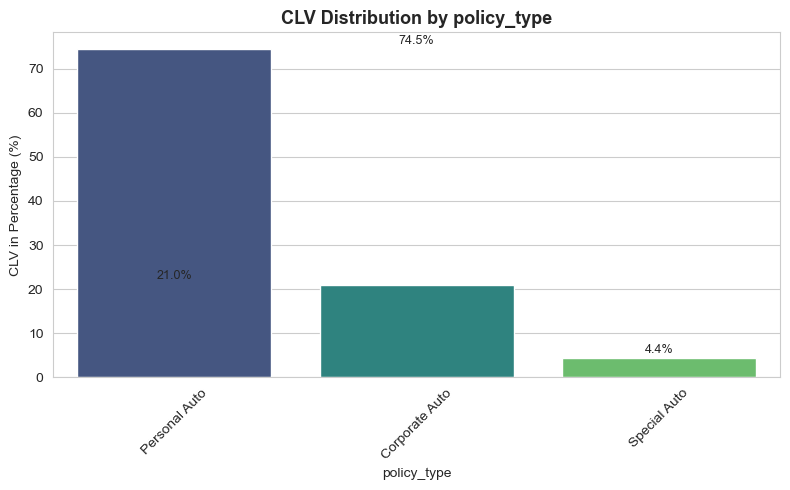

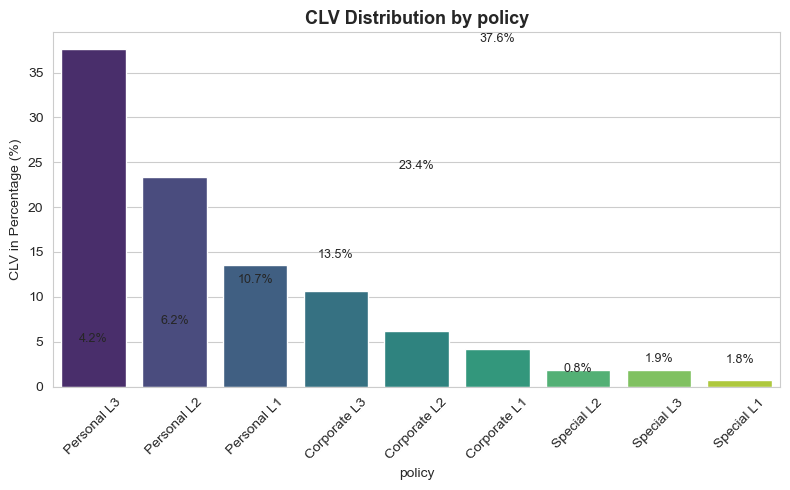

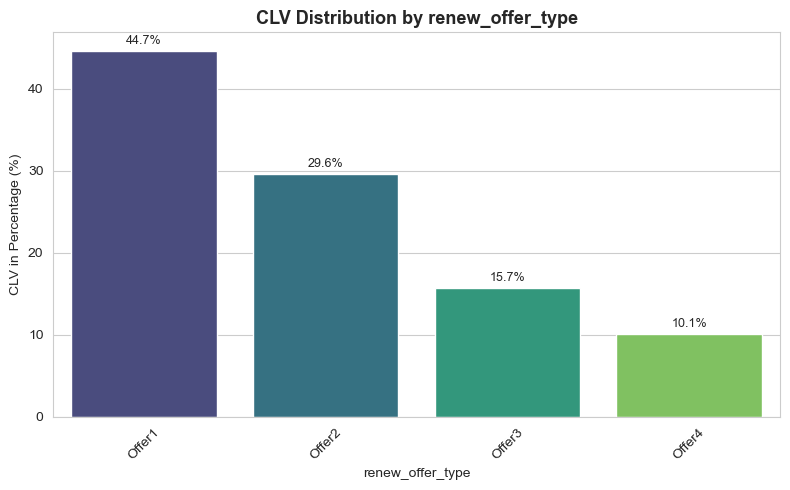

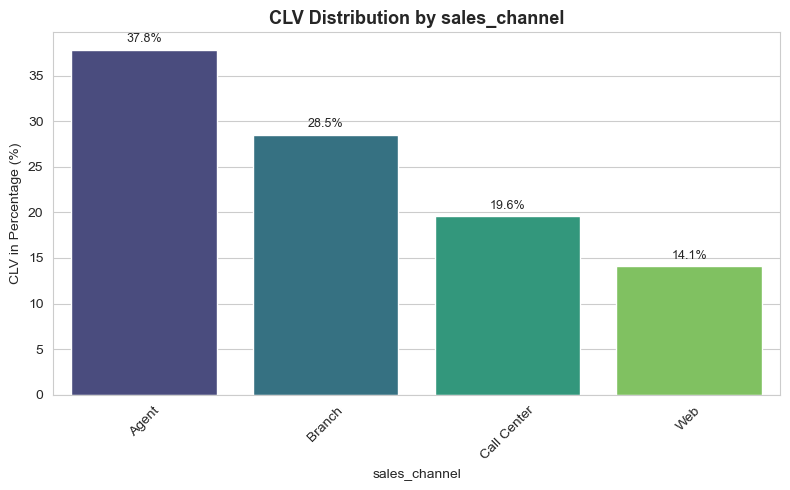

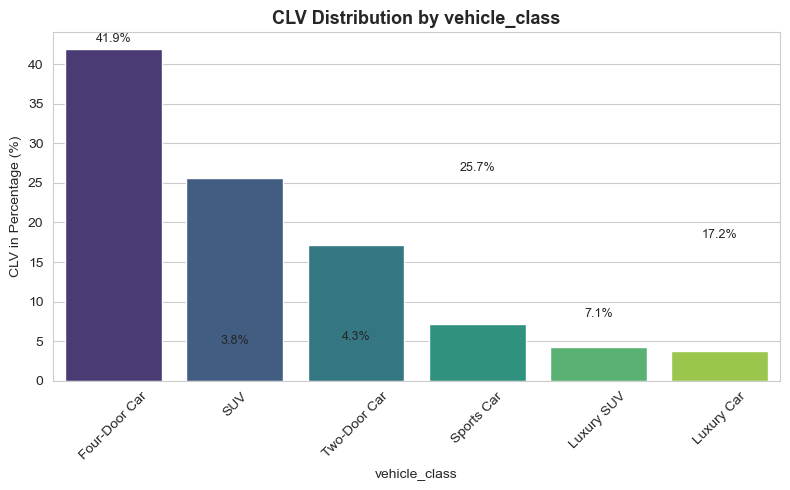

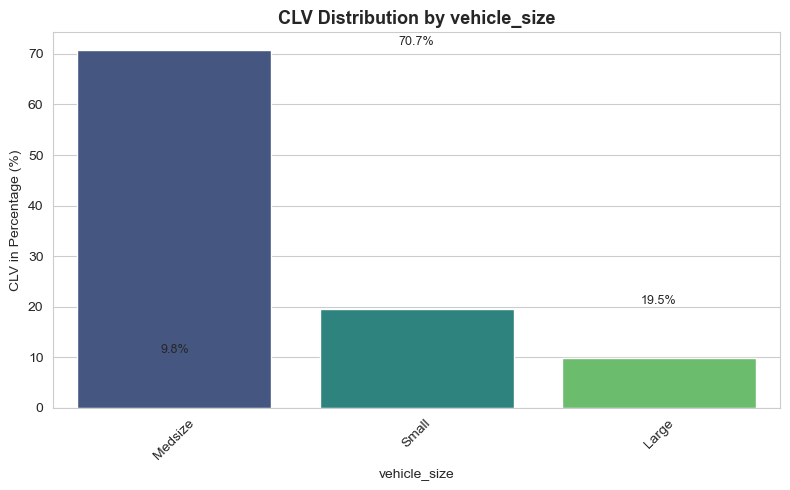

In [12]:
for col in cat_cols:
    plt.figure(figsize=(8, 5))
    # Aggregate CLV by category (sum)
    aggData = (
        clv_df.groupby(col)['customer_lifetime_value']
          .sum()
          .reset_index()
          .rename(columns={'customer_lifetime_value': 'Total_CLV'})
    )
    # Compute each category’s percentage share of total CLV
    aggData['CLV_percent'] = (aggData['Total_CLV'] / aggData['Total_CLV'].sum()) * 100
    # Sort categories by percentage (descending)
    aggData = aggData.sort_values('CLV_percent', ascending=False)
    # --- Updated line to avoid FutureWarning ---
    ax = sns.barplot(
        data=aggData,
        x=col,
        y='CLV_percent',
        hue=col,              # assign hue explicitly
        palette='viridis',
        legend=False
    )
    # Add percentage labels on bars
    for i, row in aggData.iterrows():
        ax.text(
            i, 
            row['CLV_percent'] + 0.5, 
            f"{row['CLV_percent']:.1f}%", 
            ha='center', va='bottom', fontsize=9
        )
    # Titles and axis labels
    ## CHECK THE PERCENTAGES TO ENSURE THAT THEY ARE PROPERLY ALLOCATED ##
    plt.title(f"CLV Distribution by {col}", fontsize=13, weight='bold')
    plt.xlabel(col)
    plt.ylabel("CLV in Percentage (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

Look at the average CLV per each categorical value

In [13]:
for col in cat_cols:
    avg_clv = clv_df.groupby(col)['customer_lifetime_value'].mean().sort_values(ascending=False)
    print(f"\nAverage Customer Lifetime Value by {col}:")
    print(avg_clv)


Average Customer Lifetime Value by state:
state
Oregon        8077.901191
Nevada        8056.706839
Washington    8021.472273
California    8003.647758
Arizona       7861.341489
Name: customer_lifetime_value, dtype: float64

Average Customer Lifetime Value by customer_response_to_offer:
customer_response_to_offer
No     8030.022305
Yes    7854.871361
Name: customer_lifetime_value, dtype: float64

Average Customer Lifetime Value by coverage:
coverage
Premium     10895.603083
Extended     8789.677608
Basic        7190.706422
Name: customer_lifetime_value, dtype: float64

Average Customer Lifetime Value by education:
education
High School or Below    8296.709033
Master                  8243.484692
Bachelor                7872.660412
College                 7851.064644
Doctor                  7520.344837
Name: customer_lifetime_value, dtype: float64

Average Customer Lifetime Value by employment_status:
employment_status
Employed         8219.117754
Disabled         7847.889354
Medical Le

#### Numerical EDA

Explore the distributions of the numerical columns

In [14]:
num_cols = clv_df.select_dtypes(include='number').columns
num_cols

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [15]:
clv_df.describe(include=[np.number])

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


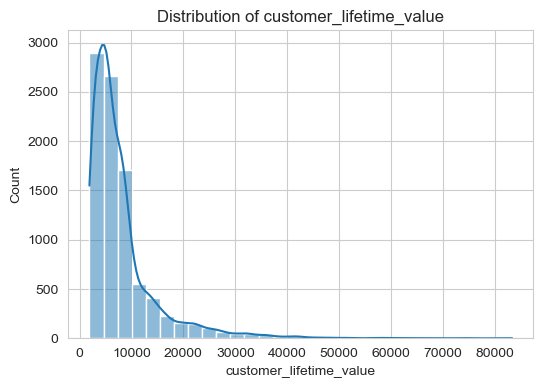

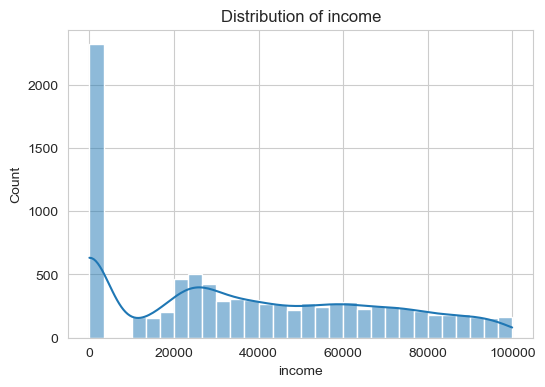

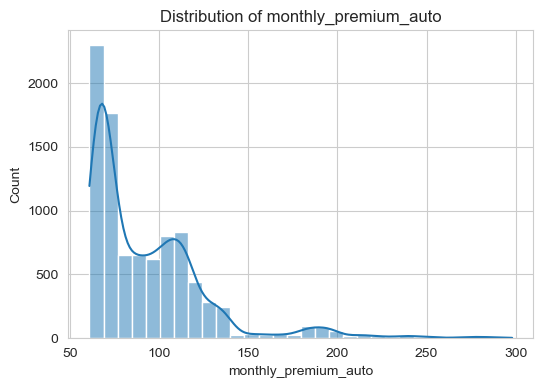

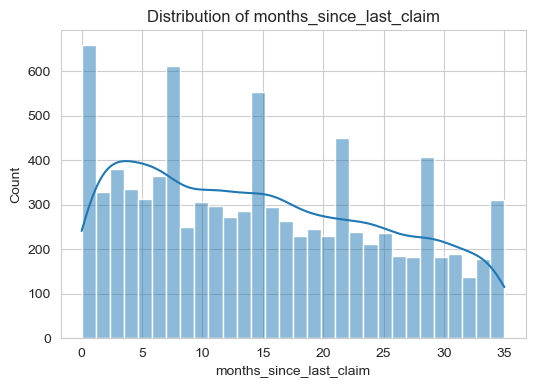

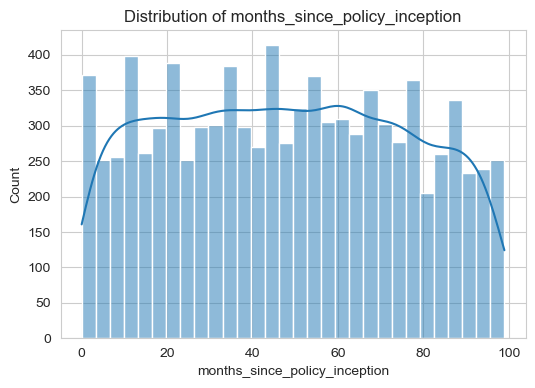

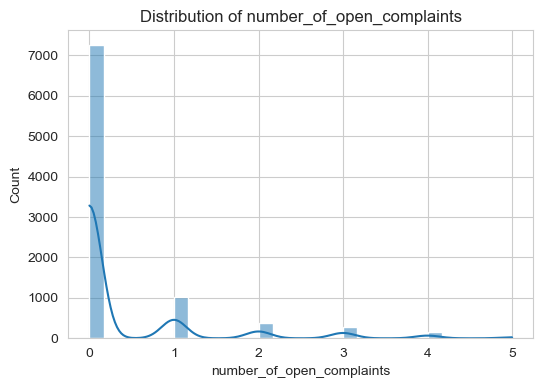

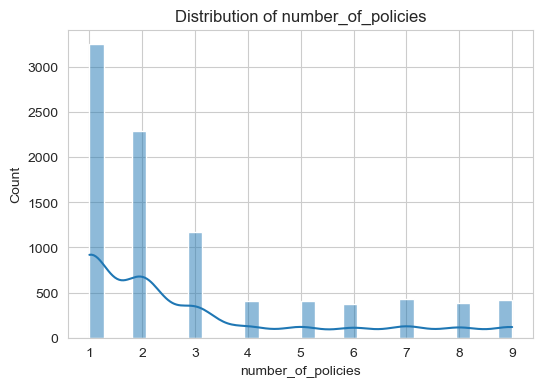

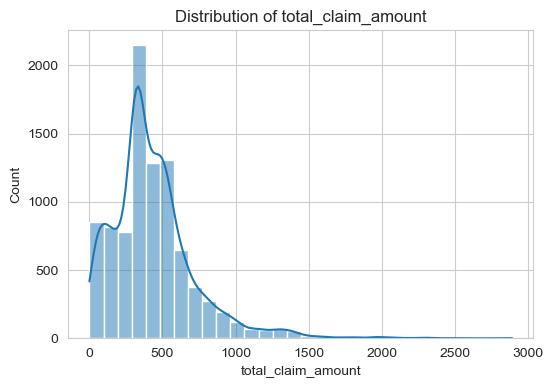

In [16]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(clv_df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

Check the box plots of our numerical data to view outliers and 5 number summaries:


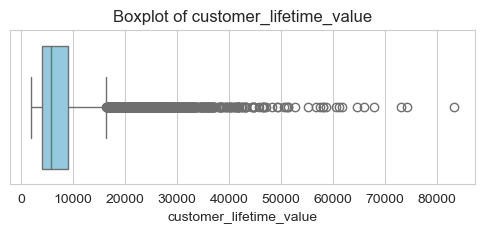

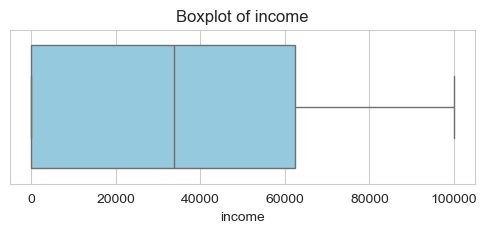

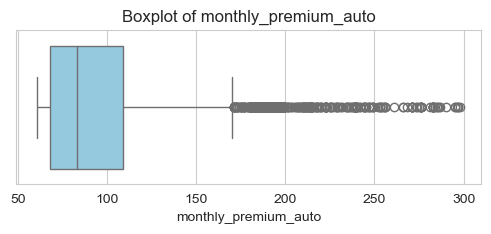

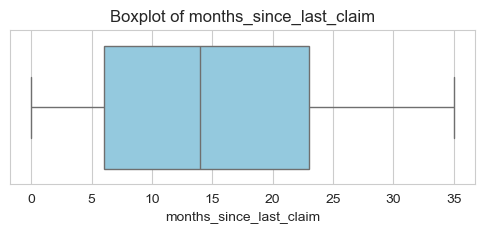

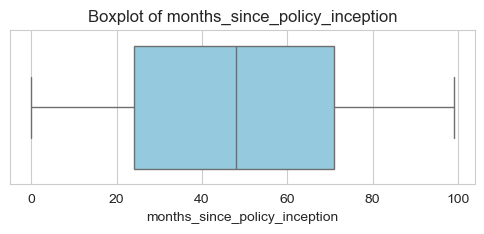

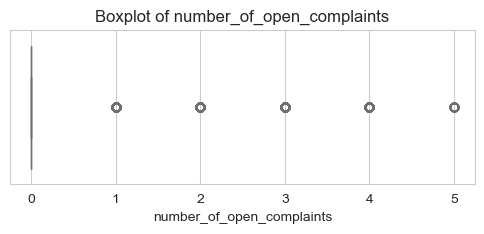

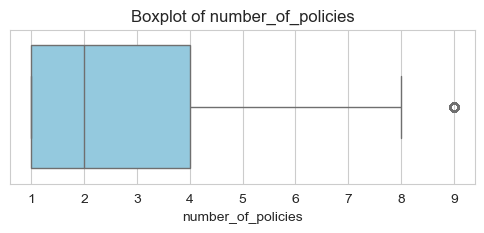

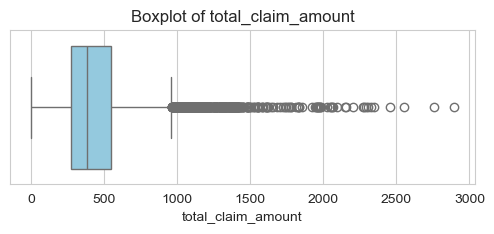

In [17]:
for col in num_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=clv_df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.show()

Pair plot 

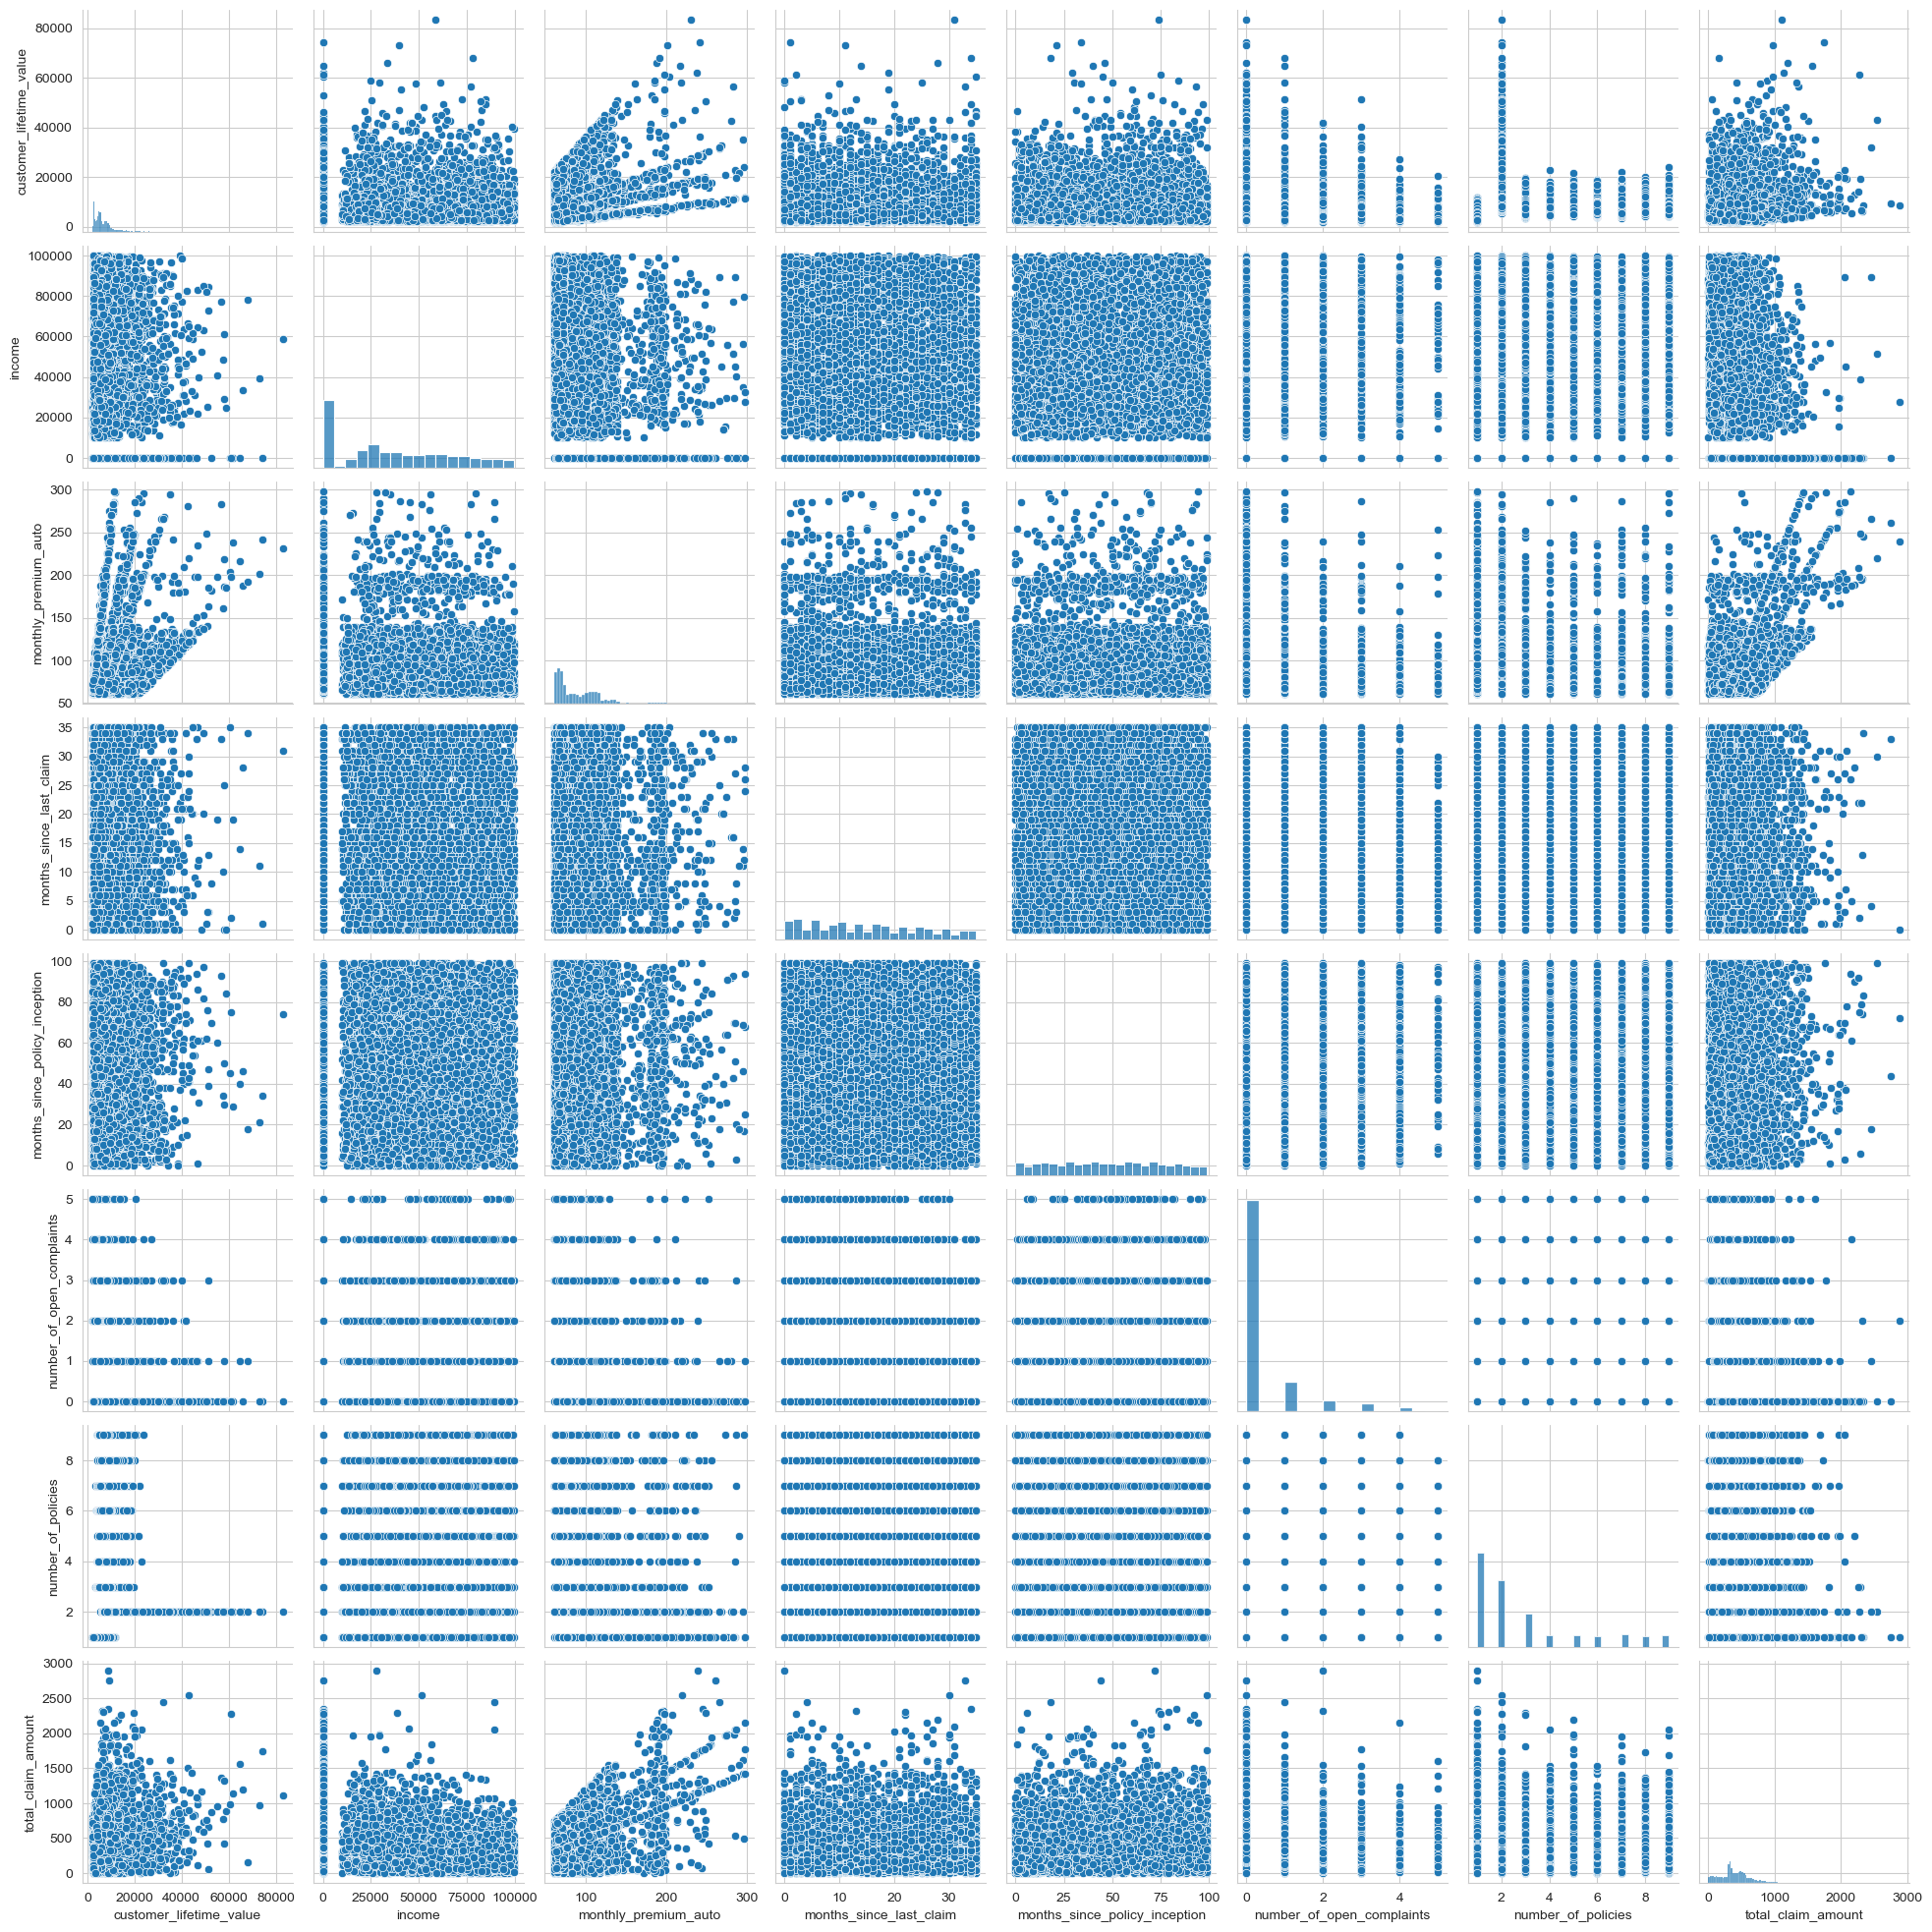

In [18]:
sns.pairplot(clv_df[num_cols]);
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

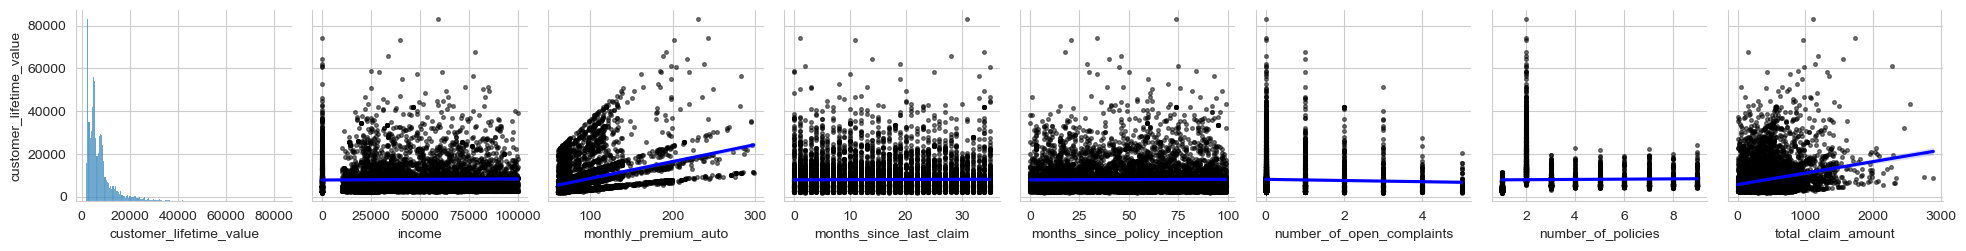

In [19]:
fig = sns.pairplot(
    clv_df[num_cols]
    ,y_vars=['customer_lifetime_value']
    ,kind='reg' ## regression 
    ,plot_kws={
        "line_kws":{'color':'blue'},
        "scatter_kws":{"alpha":0.5,"color":"k","s":7},
        },
)
 
plt.show

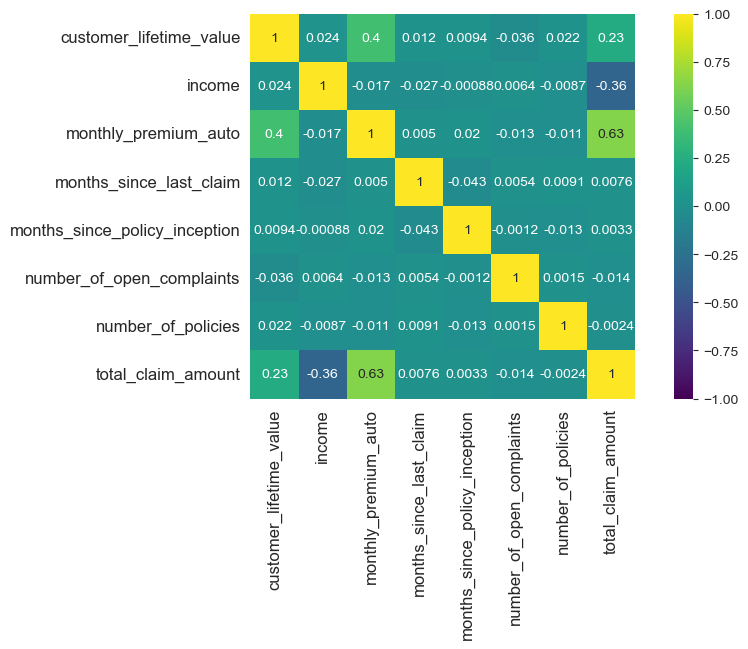

In [20]:
corr_matrix = clv_df[num_cols].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(
    corr_matrix,
    vmax=1, vmin=-1,
    square=True,
    annot=True,
    cmap="viridis"
)
plt.tick_params(labelsize=12)
plt.show()

In [21]:
clv_df = clv_df.drop(columns = ['customer', 'policy_expiration_date'])

In [22]:
clv_df = pd.get_dummies(clv_df, drop_first=True)

In [23]:
bool_cols = clv_df.select_dtypes(include='bool').columns
clv_df[bool_cols] = clv_df[bool_cols].astype(int)

In [24]:
clv_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_California,state_Nevada,state_Oregon,state_Washington,customer_response_to_offer_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employment_status_Employed,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,2813.692575,43836,73,12,44,0,1,138.130879,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [25]:
X = clv_df.drop(columns = 'customer_lifetime_value')
y = clv_df['customer_lifetime_value']

In [26]:
# One-hot encode categorical variable
 
# Add constant term (intercept)
X = sm.add_constant(X)
 
# Fit OLS model
model = sm.OLS(y, X).fit()
 
# Print detailed summary
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     customer_lifetime_value   R-squared:                       0.169
Model:                                 OLS   Adj. R-squared:                  0.165
Method:                      Least Squares   F-statistic:                     38.60
Date:                     Fri, 17 Oct 2025   Prob (F-statistic):          6.92e-323
Time:                             16:00:51   Log-Likelihood:                -92812.
No. Observations:                     9134   AIC:                         1.857e+05
Df Residuals:                         9085   BIC:                         1.861e+05
Df Model:                               48                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------